In [42]:
# ---------------
# All parameters
# ---------------
class Params:
    def __init__(self):
        # Paramaters for this experiment
        self.exp_id = 'DQN-Beat-Atari-3'
        self.env_id = 'BreakoutDeterministic-v4' # 'HalfCheetahMuJoCoEnv-v0' # 'Pendulum-v0' # 'InvertedPendulumMuJoCoEnv-v0' #
        self.server_path = '/home/bryanbc/Repos/rl/'
        self.hw = 'hw03'
        self.video_path = self.server_path + self.hw + '/' + self.exp_id + '/video/'
        self.mp4list_path = self.video_path + '*.mp4'
        
        self.save_model_episode_interval = 50
        self.saved_models_path = '/ssd/bryanbc/saved_models/' + self.hw + '/' + self.exp_id
        self.train_start_episode = 0
        
        # Parameters for models
        self.learning_rate = 0.001
        self.batch_size = 128
        self.epsilon = 1.0
        self.epsilon_decay = 0.99
        self.gamma = 0.99
        self.tau   =  0.001 # 0.125
        self.max_buffer = 1000000
        self.dropout_rate = 0.5
        self.sigma = 0.01
        
        # Parameters for enviroment
        self.max_episodes = 5000
        self.max_steps = 1000
        self.EPS = 0.003
        
        self.log_path = '/ssd/bryanbc/data/logs/hw/' + self.hw + '/' + self.exp_id + '_' + self.env_id + '-'
        
PARAMS = Params()

In [43]:
# # -------------------------------------------------
# #  Write log data for visualization in Tensorboard
# # -------------------------------------------------
# from tensorboardX import SummaryWriter

# class DataLogger():
#     def __init__(self):
#         self.log_path = PARAMS.log_path
#         self.logdir = self.log_path[:-1] + '/runs/'
#         self.writer = SummaryWriter(logdir=self.logdir)
        
#     def write2tb(self):
#         # Write log data into tensorboard
#         log_file = open((PARAMS.log_path + 'episode_reward.log'), 'r')
#         for i, reward in enumerate(log_file):
#             # print("i: ", i, " reward: ", reward)
#             self.writer.add_scalar('episode_reward', float(reward), i)
        

# data_logger = DataLogger()
# data_logger.write2tb()
# print("Check tensorboard now.")

PARAMS.log_path:  /ssd/bryanbc/data/logs/hw/hw03/DQN-Beat-Atari-3_BreakoutDeterministic-v4-


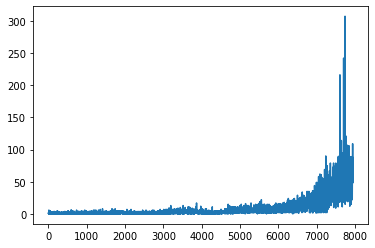

<Figure size 8568x2376 with 0 Axes>

In [70]:
# ---------
#  Display
# ---------
import matplotlib.pyplot as plt
print("PARAMS.log_path: ", PARAMS.log_path)
class DataDisplayer():
    def __init__(self):
        self.log_path = PARAMS.log_path
        self.logdir = self.log_path[:-1] + '/runs/'
        
    def draw(self):
        log_file = open((PARAMS.log_path + 'episode_reward.log'), 'r')
        x, y = [], []
        for i, reward in enumerate(log_file):
            # print("i: ", i, " reward: ", reward)
            x.append(i + 1)
            y.append(float(reward))
        # print("x: ", x, " y: ", y)
        
#         plt.plot(x[:2000], y[:2000])
        plt.plot(x, y)
#         plt.stackplot(x, y)
#         plt.scatter(x, y)
        
        plt.figure(figsize=(119, 33))
        plt.show()

data_displayer = DataDisplayer()
data_displayer.draw()

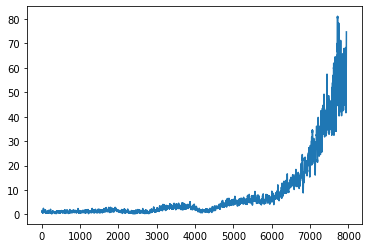

<Figure size 8568x2376 with 0 Axes>

In [63]:
# ---------
#  Display
# ---------
import matplotlib.pyplot as plt
import numpy as np

n_avg = 10
class DataDisplayer():
    def __init__(self):
        self.log_path = PARAMS.log_path
        
    def draw(self):
        log_file = open((PARAMS.log_path + 'episode_reward.log'), 'r')
        x, y, y_ten_mean = [], [], []
        for i, reward in enumerate(log_file):
            # print("i: ", i, " reward: ", reward)
            y.append(float(reward))
            if i > n_avg:
                x.append(i + 1)
                y_ten_mean.append(np.mean(y[-n_avg:]))
        # print("x: ", x, " y: ", y)
        plt.plot(x, y_ten_mean)
        plt.figure(figsize=(119, 33))
        plt.show()

data_displayer = DataDisplayer()
data_displayer.draw()

https://github.com/IntoxicatedDING/DQN-Beat-Atari